## Este notebook tem como objetivo apresentar os resultados obtidos no PIBIC

In [1]:
import matplotlib.pyplot as plt
import scienceplots
plt.style.use('science')

import matplotlib as mpl
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from tqdm.notebook import tqdm

import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.rcParams['font.size'] = 10
plt.rcParams['lines.linewidth'] = 1.8
plt.rcParams['text.usetex'] = False

figurePath = r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Figuras\Pibic'
path_data_Silas_Desktop = r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic'

In [3]:
def loadArray(file_path_prefix, num_files, file_path_suffix, flag_mean=False):
    
    data_list = []
    
    for i in range(num_files):
        file_path = f"{file_path_prefix}{i}{file_path_suffix}"
        with open(file_path, 'rb') as stream:
            data = np.load(stream)
            data_list.append(data)
    
    if flag_mean:
        data = np.mean(data_list, axis=0)
        return data
    
    else:
        return data_list

### Dados Para os Resultados Parciais

In [19]:
num_files = 4 # Número de arquivos a serem carregados

# CSPR 
for indfile in range(0, num_files):
    CSPR_BER_PARCIAL = loadArray(path_data_Silas_Desktop+'\CSPR_BER_SpS_4_128_Sample_', indfile, '_outlier.npy', True)
    CSPR_SER_PARCIAL = loadArray(path_data_Silas_Desktop+'\CSPR_SER_SpS_4_128_Sample_', indfile, '_outlier.npy', True)
    CSPR_SNR_PARCIAL = loadArray(path_data_Silas_Desktop+'\CSPR_SNR_SpS_4_128_Sample_', indfile, '_outlier.npy', True) 
    CSPR_SIR_PARCIAL = loadArray(path_data_Silas_Desktop+'\CSPR_SIR_SpS_4_128_Sample_', indfile, '_outlier.npy', True)  

# Roll-off
for indfile in range(0, num_files):
    Rolloff_BER_PARCIAL = loadArray(path_data_Silas_Desktop+'\Rolloff_BER_SpS_4_128_Sample_', indfile, '.npy', True)
    Rolloff_SER_PARCIAL = loadArray(path_data_Silas_Desktop+'\Rolloff_SER_SpS_4_128_Sample_', indfile, '.npy', True)
    Rolloff_SNR_PARCIAL = loadArray(path_data_Silas_Desktop+'\Rolloff_SNR_SpS_4_128_Sample_', indfile, '.npy', True) 
    Rolloff_SIR_PARCIAL = loadArray(path_data_Silas_Desktop+'\Rolloff_SIR_SpS_4_128_Sample_', indfile, '.npy', True) 

# Frequency Offset 
FO_BER_PARCIAL = np.load(r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic\FO_BER_SpS_4_128_Sample.npy')
FO_SER_PARCIAL = np.load(r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic\FO_SER_SpS_4_128_Sample.npy')
FO_SNR_PARCIAL = np.load(r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic\FO_SNR_SpS_4_128_Sample.npy')
FO_SIR_PARCIAL = np.load(r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic\FO_SIR_SpS_4_128_Sample.npy')
    
# Dados para as métricas de CSPR
#CSPR_BER = loadArray(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Data\Pibic\CSPR_BER_SpS_4_128_Sample_0_AWGN_debug.npy')
#CSPR_SNR = loadArray(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Data\Pibic\CSPR_SNR_SpS_4_128_Sample_0_AWGN_debug.npy')
#CSPR_SIR = loadArray(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Data\Pibic\CSPR_SIR_SpS_4_128_Sample_0_AWGN_debug.npy')
#CSPR_SER = loadArray(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Data\Pibic\CSPR_SER_SpS_4_128_Sample_0_AWGN_debug.npy') 

#CSPR_BER_2 = loadArray(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Data\Pibic\CSPR_BER_SpS_4_128_Sample_0_AWGN_TRAIN.npy')
#CSPR_SNR_2 = loadArray(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Data\Pibic\CSPR_SNR_SpS_4_128_Sample_0_AWGN_TRAIN.npy')
#CSPR_SIR_2 = loadArray(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Data\Pibic\CSPR_SIR_SpS_4_128_Sample_0_AWGN_TRAIN.npy')
#CSPR_SER_2 = loadArray(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Data\Pibic\CSPR_SER_SpS_4_128_Sample_0_AWGN_TRAIN.npy') 

### Simulações realizadas com o canal AWGN para diferentes valores de CSPR 

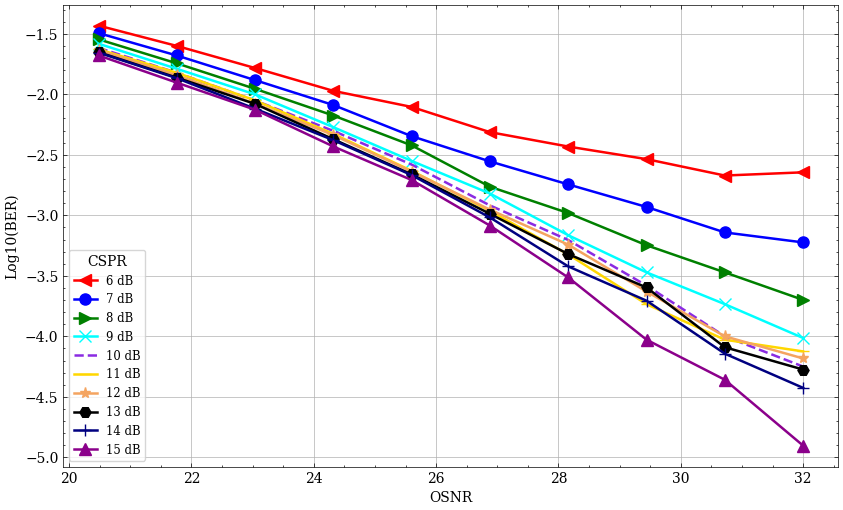

In [7]:
loPower = np.arange(6,16,1)
SNR_values = np.arange(16,26,1)
OSNR = ((1*32e9)/(2*12.5e9))*SNR_values

plt.figure(figsize=(10,6))

labels = ['-<', '-o', '->', '-x', '--', '-_', '-*', '-H', '-+', '-^']
colors = ['red', 'blue', 'green', 'aqua', 'blueviolet', 'gold', 'sandybrown', 'black', 'navy', 'darkmagenta']

for index, indCSPR in enumerate(loPower):
    plt.plot(OSNR, np.log10(CSPR_BER_2[:,index][0]), labels[index], markersize=8, color = colors[index], label=str(indCSPR)+' dB')

plt.legend(title="CSPR", loc=3, fontsize='small', frameon=True);
#plt.text(26.5,-0.5,'Conv-Rx 3', fontsize = 14, bbox=dict(facecolor='white', alpha=0.5))
#plt.title('ConvNet Receiver');
plt.xlabel('OSNR');
plt.ylabel('Log10(BER)');
plt.grid();

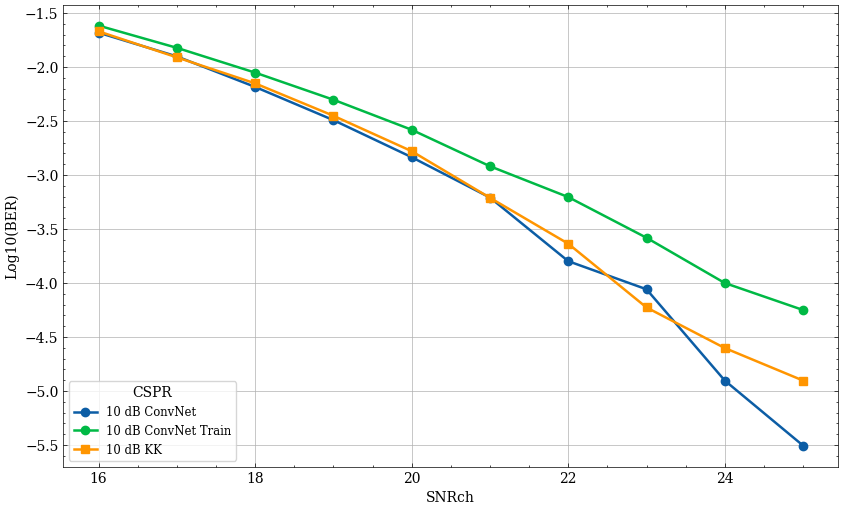

In [22]:
plt.figure(figsize=(10,6))

plt.plot(SNR_values, np.log10(CSPR_BER[:,4][2]), '-o', label='10 dB ConvNet')
plt.plot(SNR_values, np.log10(CSPR_BER_2[:,4][0]), '-o', label='10 dB ConvNet Train')
#plt.plot(OSNR, np.log10(CSPR_BER[:,1][1]), '-x', label='7 dB MLP')
plt.plot(SNR_values, np.log10(CSPR_BER[:,4][0]), '-s', label='10 dB KK')

plt.legend(title="CSPR", loc=3, fontsize='small', frameon=True);
#plt.text(26.5,-0.5,'Conv-Rx 3', fontsize = 14, bbox=dict(facecolor='white', alpha=0.5))
#plt.title('ConvNet Receiver');
plt.xlabel('SNRch');
plt.ylabel('Log10(BER)');
plt.grid();

## CSPR variations results

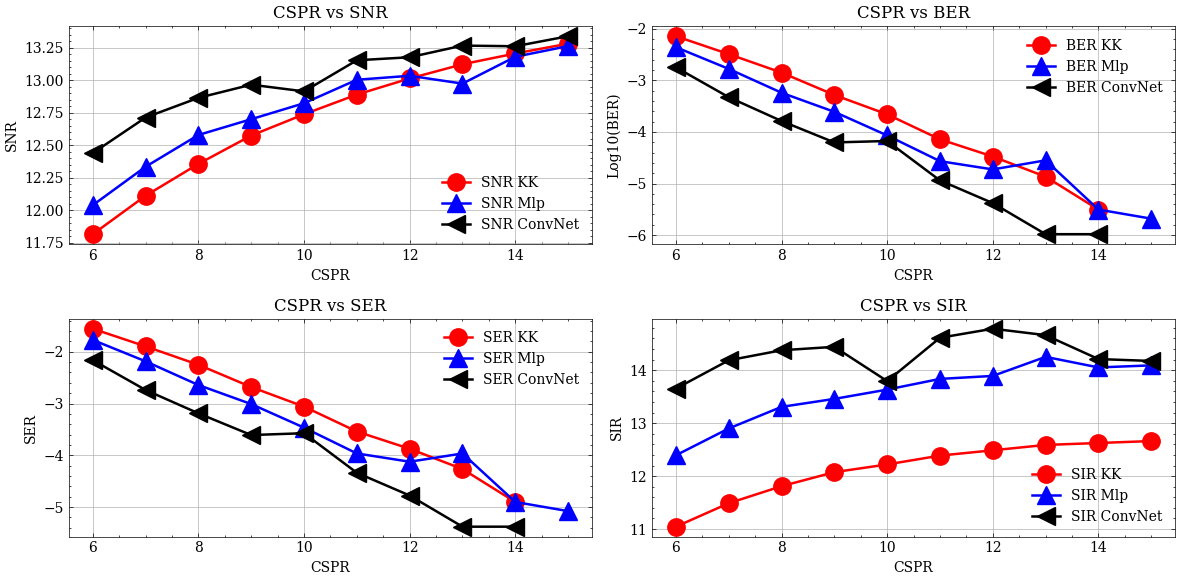

In [12]:
loPower = np.arange(6,16,1)
savePlots = False
markersize = 12.5
plt.figure(num=None, figsize=(12, 6))

graphic01 = plt.subplot(2, 2, 1)
plt.plot(loPower, 10*np.log10(CSPR_SNR_PARCIAL[0,:]), color='red', marker='o', markersize=markersize, label='SNR KK')
plt.plot(loPower, 10*np.log10(CSPR_SNR_PARCIAL[1,:]), color='blue', marker='^', markersize=markersize, label='SNR Mlp')
plt.plot(loPower, 10*np.log10(CSPR_SNR_PARCIAL[2,:]), color='black', marker='<', markersize=markersize, label='SNR ConvNet')
plt.xlabel('CSPR')
plt.ylabel('SNR')
plt.title('CSPR vs SNR')
plt.legend()
plt.grid()

graphic02 = plt.subplot(2, 2, 2)
plt.plot(loPower, np.log10(CSPR_BER_PARCIAL[0,:]), color='red', marker='o', markersize=markersize, label='BER KK')
plt.plot(loPower, np.log10(CSPR_BER_PARCIAL[1,:]), color='blue', marker='^', markersize=markersize, label='BER Mlp')
plt.plot(loPower, np.log10(CSPR_BER_PARCIAL[2,:]), color='black', marker='<', markersize=markersize, label='BER ConvNet')
plt.xlabel('CSPR')
plt.ylabel('Log10(BER)')
plt.title('CSPR vs BER')
plt.legend()
plt.grid()

graphic03 = plt.subplot(2, 2, 3)
plt.plot(loPower, np.log10(CSPR_SER_PARCIAL[0,:]), color='red', marker='o', markersize=markersize, label='SER KK')
plt.plot(loPower, np.log10(CSPR_SER_PARCIAL[1,:]), color='blue', marker='^', markersize=markersize, label='SER Mlp')
plt.plot(loPower, np.log10(CSPR_SER_PARCIAL[2,:]), color='black', marker='<', markersize=markersize, label='SER ConvNet')
plt.xlabel('CSPR')
plt.ylabel('SER')
plt.title('CSPR vs SER')
plt.legend()
plt.grid()

graphic04 = plt.subplot(2, 2, 4)
plt.plot(loPower, 10*np.log10(CSPR_SIR_PARCIAL[0,:]), color='red', marker='o', markersize=markersize, label='SIR KK')
plt.plot(loPower, 10*np.log10(CSPR_SIR_PARCIAL[1,:]), color='blue', marker='^', markersize=markersize, label='SIR Mlp')
plt.plot(loPower, 10*np.log10(CSPR_SIR_PARCIAL[2,:]), color='black', marker='<', markersize=markersize, label='SIR ConvNet')
plt.xlabel('CSPR')
plt.ylabel('SIR')
plt.title('CSPR vs SIR')
plt.legend()
plt.grid()

plt.tight_layout()

if savePlots:
     plt.savefig(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Figuras\Pibic'+'\CSPR_Results.png', dpi=600)

## Roll-off variations results

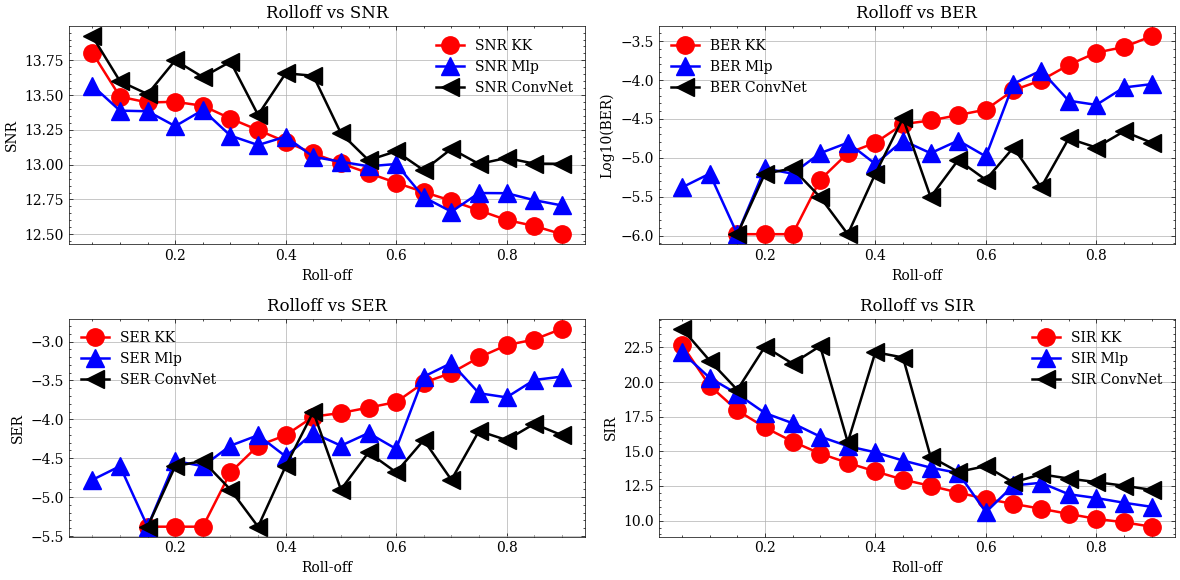

In [13]:
Rolloff = np.arange(0.05, 0.95, 0.05)
savePlots = False
markersize = 12.5

plt.figure(num=None, figsize=(12, 6))

graphic01 = plt.subplot(2, 2, 1)
plt.plot(Rolloff, 10*np.log10(Rolloff_SNR_PARCIAL[0,:]), color = 'red', marker='o', markersize=markersize, label='SNR KK')
plt.plot(Rolloff, 10*np.log10(Rolloff_SNR_PARCIAL[1,:]), color = 'blue', marker='^', markersize=markersize, label='SNR Mlp')
plt.plot(Rolloff, 10*np.log10(Rolloff_SNR_PARCIAL[2,:]), color = 'black', marker='<', markersize=markersize, label='SNR ConvNet')
plt.xlabel('Roll-off')
plt.ylabel('SNR')
plt.title('Rolloff vs SNR')
plt.legend()
plt.grid()

graphic02 = plt.subplot(2, 2, 2)
plt.plot(Rolloff, np.log10(Rolloff_BER_PARCIAL[0,:]), color = 'red', marker='o', markersize=markersize, label='BER KK')
plt.plot(Rolloff, np.log10(Rolloff_BER_PARCIAL[1,:]), color = 'blue', marker='^', markersize=markersize, label='BER Mlp')
plt.plot(Rolloff, np.log10(Rolloff_BER_PARCIAL[2,:]), color = 'black', marker='<', markersize=markersize, label='BER ConvNet')
plt.xlabel('Roll-off')
plt.ylabel('Log10(BER)')
plt.title('Rolloff vs BER')
plt.legend()
plt.grid()

graphic03 = plt.subplot(2, 2, 3)
plt.plot(Rolloff, np.log10(Rolloff_SER_PARCIAL[0,:]), color = 'red', marker='o', markersize=markersize, label='SER KK')
plt.plot(Rolloff, np.log10(Rolloff_SER_PARCIAL[1,:]), color = 'blue', marker='^', markersize=markersize, label='SER Mlp')
plt.plot(Rolloff, np.log10(Rolloff_SER_PARCIAL[2,:]), color = 'black', marker='<', markersize=markersize, label='SER ConvNet')
plt.xlabel('Roll-off')
plt.ylabel('SER')
plt.title('Rolloff vs SER')
plt.legend()
plt.grid()

graphic04 = plt.subplot(2, 2, 4)
plt.plot(Rolloff, 10*np.log10(Rolloff_SIR_PARCIAL[0,:]), color = 'red', marker='o', markersize=markersize, label='SIR KK')
plt.plot(Rolloff, 10*np.log10(Rolloff_SIR_PARCIAL[1,:]), color = 'blue', marker='^', markersize=markersize, label='SIR Mlp')
plt.plot(Rolloff, 10*np.log10(Rolloff_SIR_PARCIAL[2,:]), color = 'black', marker='<', markersize=markersize, label='SIR ConvNet')
plt.xlabel('Roll-off')
plt.ylabel('SIR')
plt.title('Rolloff vs SIR')
plt.legend()
plt.grid()

plt.tight_layout()

if savePlots:
    plt.savefig(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Figuras\Pibic'+'\Rolloff_Results.png', dpi=600)

## FO variations results

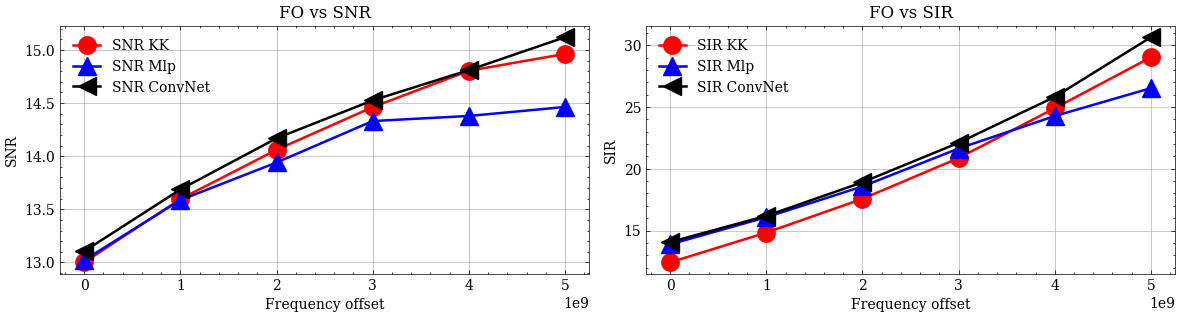

In [21]:
FO_Values = np.arange(0e9, 6e9, 1e9)
savePlots = False
markersize = 12.5

plt.figure(num=None, figsize=(12, 6))

graphic01 = plt.subplot(2, 2, 1)
plt.plot(FO_Values, 10*np.log10(FO_SNR_PARCIAL[0,:]), color = 'red', marker='o', markersize=markersize, label='SNR KK')
plt.plot(FO_Values, 10*np.log10(FO_SNR_PARCIAL[1,:]), color = 'blue', marker='^', markersize=markersize, label='SNR Mlp')
plt.plot(FO_Values, 10*np.log10(FO_SNR_PARCIAL[2,:]), color = 'black', marker='<', markersize=markersize, label='SNR ConvNet')
plt.xlabel('Frequency offset')
plt.ylabel('SNR')
plt.title('FO vs SNR')
plt.legend()
plt.grid()

# graphic02 = plt.subplot(2, 2, 2)
# plt.plot(FO_Values, np.log10(FO_BER[0,:]), marker='o', markersize=8.5, label='BER KK')
# plt.plot(FO_Values, np.log10(FO_BER[1,:]), marker='^', markersize=8.5, label='BER Mlp')
# plt.plot(FO_Values, np.log10(Conv_FO_BER[2,:]), marker='<', markersize=8.5, label='BER ConvNet')
# plt.xlabel('Frequency offset')
# plt.ylabel('Log10(BER)')
# plt.title('FO vs BER')
# plt.legend()
# plt.grid()

# graphic03 = plt.subplot(2, 2, 3)
# plt.plot(FO_Values, np.log10(FO_SER[0,:]), marker='o', markersize=8.5, label='SER KK')
# plt.plot(FO_Values, np.log10(FO_SER[1,:]), marker='^', markersize=8.5, label='SER Mlp')
# plt.plot(FO_Values, np.log10(Conv_FO_SER[2,:]), marker='<', markersize=8.5, label='SER ConvNet')
# plt.xlabel('Frequency offset')
# plt.ylabel('SER')
# plt.title('FO vs SER')
# plt.legend()
# plt.grid()

graphic04 = plt.subplot(2, 2, 2)
plt.plot(FO_Values, 10*np.log10(FO_SIR_PARCIAL[0,:]), color = 'red', marker='o', markersize=markersize, label='SIR KK')
plt.plot(FO_Values, 10*np.log10(FO_SIR_PARCIAL[1,:]), color = 'blue', marker='^', markersize=markersize, label='SIR Mlp')
plt.plot(FO_Values, 10*np.log10(FO_SIR_PARCIAL[2,:]), color = 'black', marker='<', markersize=markersize, label='SIR ConvNet')
plt.xlabel('Frequency offset')
plt.ylabel('SIR')
plt.title('FO vs SIR')
plt.legend()
plt.grid()

plt.tight_layout()

if savePlots:
    plt.savefig(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Figuras\Pibic'+'\FO_Results.png', dpi=600)